<a href="https://colab.research.google.com/github/harnalashok/LLMs/blob/main/extract_table_ca_warn_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstration of `pdfplumber`'s `extract_table` method.

This notebook uses `pdfplumber` to extract data from an [California Worker Adjustment and Retraining Notification (WARN) report](../pdfs/ca-warn-report.pdf).

### Import `pdfplumber`

In [1]:
!pip install pdfplumber -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 619.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.9 MB/s eta 0:00:00


In [2]:
import pdfplumber
print(pdfplumber.__version__)

0.11.2


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Load the PDF

In [4]:
pdf = pdfplumber.open("/gdrive/MyDrive/Colab_data_files/pdf/258.pdf")

### Get the first page

In [5]:
p0 = pdf.pages[0]

### Display the first page

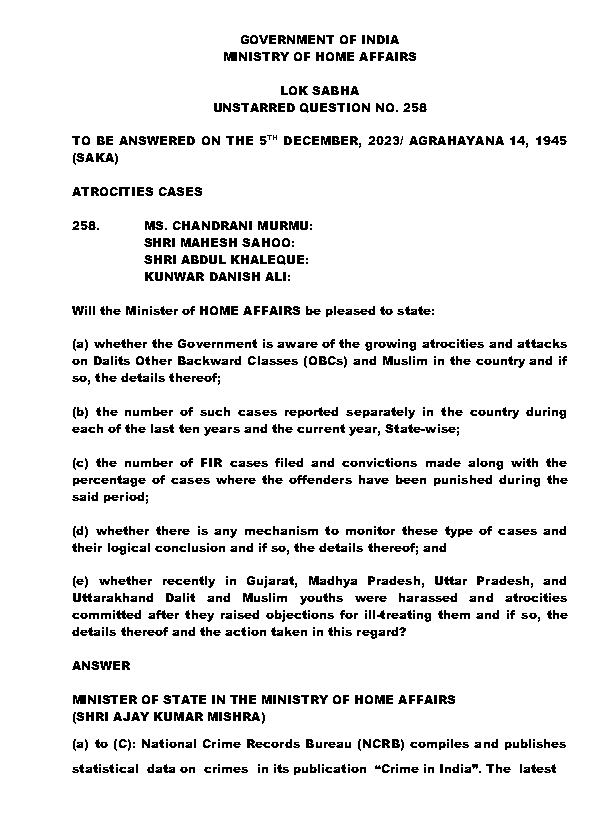

In [6]:
im = p0.to_image()
im

### Use `.extract_table` to get the data from the largest table on the page

In [10]:
p2 = pdf.pages[2]
p2

<Page:3>

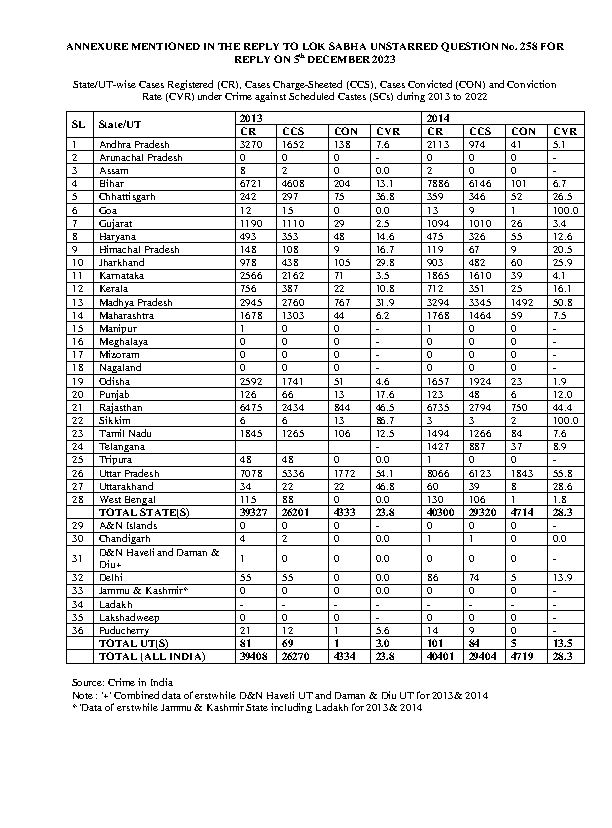

In [11]:
im = p2.to_image()
im

In [12]:
table = p2.extract_table()

`.extract_table` returns a list of lists, with each inner list representing a row in the table. Here are the first three rows:

In [15]:
table[:5]

[['SL', 'State/UT', '2013', None, None, None, '2014', None, None, None],
 [None, None, 'CR', 'CCS', 'CON', 'CVR', 'CR', 'CCS', 'CON', 'CVR'],
 ['1',
  'Andhra Pradesh',
  '3270',
  '1652',
  '138',
  '7.6',
  '2113',
  '974',
  '41',
  '5.1'],
 ['2', 'Arunachal Pradesh', '0', '0', '0', '-', '0', '0', '0', '-'],
 ['3', 'Assam', '8', '2', '0', '0.0', '2', '0', '0', '-']]

## Basic cleanup

We can use `pandas` to render the list as a DataFrame, and to remove the extra spaces within some of the dates.

In [14]:
import pandas as pd

In [16]:
df = pd.DataFrame(table[1:], columns=table[0])
df.head()

,SL,State/UT,2013,None,None,None,2014,None,None,None
0,None,None,CR,CCS,CON,CVR,CR,CCS,CON,CVR
1,1,Andhra Pradesh,3270,1652,138,7.6,2113,974,41,5.1
2,2,Arunachal Pradesh,0,0,0,-,0,0,0,-
3,3,Assam,8,2,0,0.0,2,0,0,-
4,4,Bihar,6721,4608,204,13.1,7886,6146,101,6.7


## How did it work?

We can use `pdfplumber`'s visual debugging to show how the table was extracted. The red lines represent the lines `pdfplumber` found on the page; the blue circles represent the intersections of those lines, and the light-blue shading indicates the cells derived from those intersections.

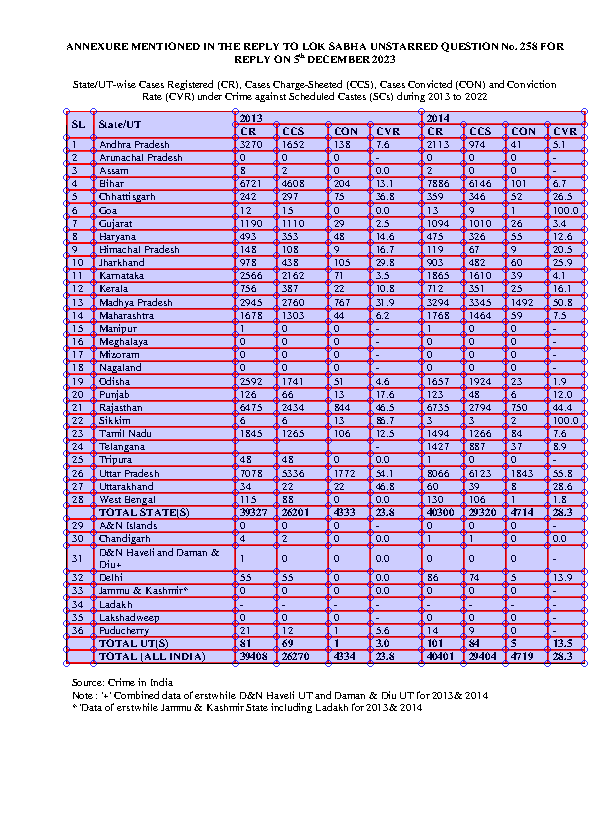

In [17]:
im.debug_tablefinder()

---

---

---